In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
SESSION_DIR = '/Users/tnguyen/src/bert/JUL17_B/'
OUTPUT_DIR = os.path.join(SESSION_DIR, 'outputs_drop04_lr01e-5')

# Training data set

In [3]:
train_df = pd.read_csv(os.path.join(SESSION_DIR, 'train.csv'))
dev_df = pd.read_csv(os.path.join(SESSION_DIR, 'dev.csv'))
train_df = pd.concat([train_df, dev_df])

In [4]:
train_df.head()

,job_id,job_text,level1_id
0,5aff17d812f61b67f06afc3a,sr information architect ¥ summary role evalua...,18
1,5898ea11bcaee36edce75244,iam controls compliance analyst ¥ position sum...,20
2,57fffbfad20baf05d08aa807,maintenance manager ¥ maintenance manager come...,15
3,5bc7645b12f61b65c930c786,supervisor utilization management rn preferred...,16
4,5a8afab012f61b09d6217d68,oconus support engineer ¥ opportunity support ...,19


## Number of jobs per class

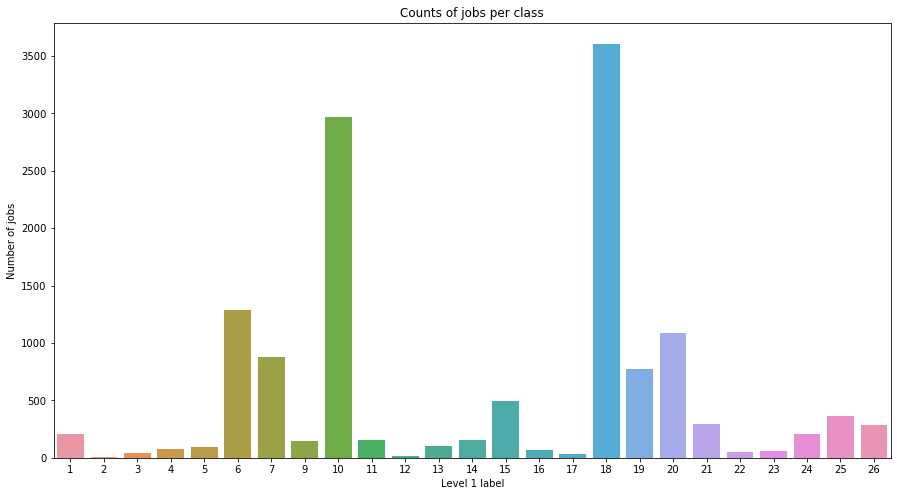

In [13]:
jobs_count, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot('level1_id', data=train_df)
ax.set_title('Counts of jobs per class')
ax.set_xlabel('Level 1 label')
ax.set_ylabel('Number of jobs')
plt.show()

# Prediction

In [16]:
train_predict = pd.read_csv(os.path.join(OUTPUT_DIR, 'train_predict.csv'))

In [22]:
train_predict['correct'] = train_predict['predicted_label'] == train_predict['label']

In [23]:
train_predict.head()

,job_id,predicted_label,label,correct
0,5aff17d812f61b67f06afc3a,18,18,True
1,5898ea11bcaee36edce75244,18,20,False
2,57fffbfad20baf05d08aa807,15,15,True
3,5bc7645b12f61b65c930c786,7,16,False
4,5a8afab012f61b09d6217d68,18,19,False


## Percentage of correct prediction on training set

In [24]:
print(train_predict.groupby('label').predicted_label.count())

label
1      153
2        4
3       34
4       56
5       68
6      966
7      657
9      110
10    2230
11     115
12      15
13      74
14     119
15     369
16      50
17      28
18    2706
19     581
20     817
21     223
22      37
23      41
24     158
25     273
26     215
Name: predicted_label, dtype: int64


In [27]:
df = train_predict.groupby('label').correct.describe()

print(train_predict.groupby('label').correct.describe())

      count unique    top  freq
label                          
1       153      2   True   133
2         4      2   True     2
3        34      2   True    30
4        56      2   True    45
5        68      2   True    54
6       966      2   True   915
7       657      2   True   627
9       110      2   True   100
10     2230      2   True  2148
11      115      2   True    86
12       15      1  False    15
13       74      2   True    51
14      119      2   True   105
15      369      2   True   353
16       50      2   True    32
17       28      2  False    22
18     2706      2   True  2632
19      581      2   True   509
20      817      2   True   736
21      223      2   True   194
22       37      2   True    24
23       41      2   True    29
24      158      2   True   115
25      273      2   True   239
26      215      2   True   201
